In [50]:
import pandas as pd

In [51]:
import numpy as np

In [52]:


import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [53]:
car = pd.read_csv('aniket_car_data.csv')

In [54]:
car1 = pd.read_csv('aniket_car_data.csv')

In [55]:
car = car.drop(columns= 'Unnamed: 0')

In [56]:
car

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Maruti Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,Maruti,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5837,Hyundai,Hyundai Xcent 1.1,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5838,Mahindra,Mahindra Xylo D4,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5839,Maruti,Maruti Wagon R,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [57]:
car

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Maruti Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,Maruti,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5837,Hyundai,Hyundai Xcent 1.1,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5838,Mahindra,Mahindra Xylo D4,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5839,Maruti,Maruti Wagon R,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [58]:
from sklearn.preprocessing import FunctionTransformer

In [59]:
trf = FunctionTransformer(func=np.log1p)

In [60]:
Kilometers_transformed = trf.fit_transform(car['Kilometers_Driven'])

C:\Users\HP\AppData\Local\Temp\ipykernel_31044\1962299989.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car['Kilometers_Driven'])


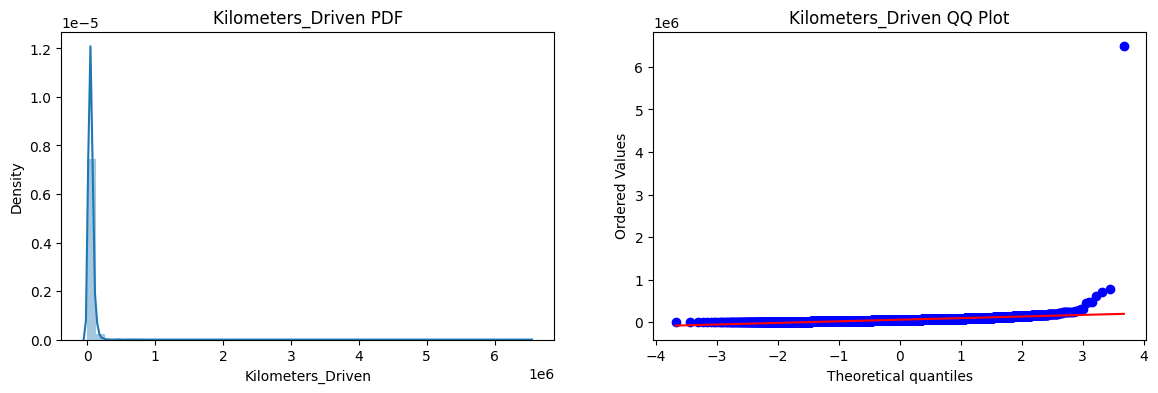

In [61]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(car['Kilometers_Driven'])
plt.title('Kilometers_Driven PDF')

plt.subplot(122)
stats.probplot(car['Kilometers_Driven'], dist="norm", plot=plt)
plt.title('Kilometers_Driven QQ Plot')

plt.show()

In [62]:
car['Kilometers_Driven']= Kilometers_transformed

C:\Users\HP\AppData\Local\Temp\ipykernel_31044\2242640739.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car['Kilometers_Driven'])


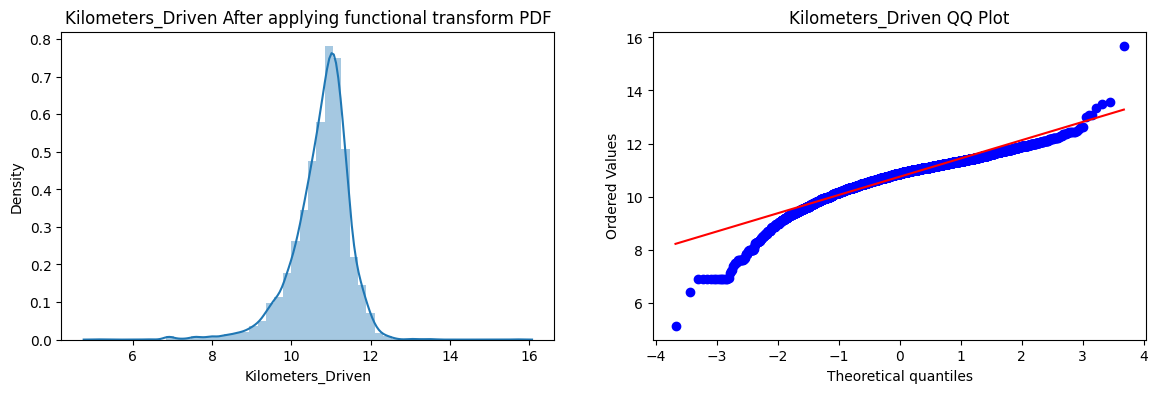

In [63]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(car['Kilometers_Driven'])
plt.title('Kilometers_Driven After applying functional transform PDF')

plt.subplot(122)
stats.probplot(car['Kilometers_Driven'], dist="norm", plot=plt)
plt.title('Kilometers_Driven QQ Plot')

plt.show()

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
car['Owner_Type'].value_counts()

Owner_Type
First             4816
Second             918
Third              100
Fourth & Above       7
Name: count, dtype: int64

In [66]:
oe = OrdinalEncoder(categories= [['Fourth & Above', 'Third', 'Second', 'First']])

In [67]:
oe.fit(car[['Owner_Type']])

OrdinalEncoder(categories=[['Fourth & Above', 'Third', 'Second', 'First']])

In [68]:
car['Owner_Type']

0        First
1        First
2        First
3        First
4       Second
         ...  
5836     First
5837     First
5838    Second
5839     First
5840     First
Name: Owner_Type, Length: 5841, dtype: object

In [69]:
car['Owner_Type']= oe.transform(car[['Owner_Type']])

In [70]:
car['Owner_Type']

0       3.0
1       3.0
2       3.0
3       3.0
4       2.0
       ... 
5836    3.0
5837    3.0
5838    2.0
5839    3.0
5840    3.0
Name: Owner_Type, Length: 5841, dtype: float64

In [71]:
car['Owner_Type']= car['Owner_Type'].astype(int)

In [72]:
car['Owner_Type']

0       3
1       3
2       3
3       3
4       2
       ..
5836    3
5837    3
5838    2
5839    3
5840    3
Name: Owner_Type, Length: 5841, dtype: int32

In [73]:
# No applying ordinal encoder to other attributees

oe_transmission = OrdinalEncoder(categories= [['Automatic', 'Manual']])
oe_transmission.fit(car[['Transmission']])
car['Transmission']= oe_transmission.transform(car[['Transmission']])
car['Transmission'] = car['Transmission'].astype(int)

In [74]:
car['Transmission']

0       1
1       1
2       1
3       1
4       0
       ..
5836    1
5837    1
5838    1
5839    1
5840    1
Name: Transmission, Length: 5841, dtype: int32

In [75]:
car['Transmission'].value_counts()

Transmission
1    4163
0    1678
Name: count, dtype: int64

In [76]:
car['Transmission'] = car['Transmission'].astype(int)

In [77]:
car['Transmission']

0       1
1       1
2       1
3       1
4       0
       ..
5836    1
5837    1
5838    1
5839    1
5840    1
Name: Transmission, Length: 5841, dtype: int32

In [78]:
car['Fuel_Type'].value_counts()

Fuel_Type
Diesel    3133
Petrol    2643
CNG         55
LPG         10
Name: count, dtype: int64

In [79]:
### Now applying ordinal encoding to fuel type

oe_fuel = OrdinalEncoder(categories= [['LPG', 'CNG', 'Petrol', 'Diesel']])
oe_fuel.fit(car[['Fuel_Type']])
car['Fuel_Type']= oe_fuel.transform(car[['Fuel_Type']])


In [80]:
car['Fuel_Type'] = car['Fuel_Type'].astype(int)

In [81]:
car['Fuel_Type']

0       1
1       3
2       2
3       3
4       3
       ..
5836    3
5837    3
5838    3
5839    2
5840    3
Name: Fuel_Type, Length: 5841, dtype: int32

In [82]:
car.drop(columns= 'Seats', inplace=True, axis=1)

In [83]:
car

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,Maruti,Maruti Wagon R,Mumbai,2010,11.184435,1,1,3,26.60,998,58.16,1.75
1,Hyundai,Hyundai Creta 1.6,Pune,2015,10.621352,3,1,3,19.67,1582,126.20,12.50
2,Honda,Honda Jazz V,Chennai,2011,10.736418,2,1,3,18.20,1199,88.70,4.50
3,Maruti,Maruti Ertiga VDI,Chennai,2012,11.373675,3,1,3,20.77,1248,88.76,6.00
4,Audi,Audi A4 New,Coimbatore,2013,10.613271,3,0,2,15.20,1968,140.80,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5836,Maruti,Maruti Swift VDI,Delhi,2014,10.217057,3,1,3,28.40,1248,74.00,4.75
5837,Hyundai,Hyundai Xcent 1.1,Jaipur,2015,11.512935,3,1,3,24.40,1120,71.00,4.00
5838,Mahindra,Mahindra Xylo D4,Jaipur,2012,10.915107,3,1,2,14.00,2498,112.00,2.90
5839,Maruti,Maruti Wagon R,Kolkata,2013,10.736418,2,1,3,18.90,998,67.10,2.65


In [84]:
X =  car.drop(columns= ['Price'])
y = car['Price']

oe_location = OrdinalEncoder(categories= [['Mumbai', 'Pune','Chennai', 'Coimbatore', 'Delhi', 'Jaipur', 'Kolkata', 'Kochi', 'Ahmedabad', 'Hyderabad', 'Bangalore']])

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [87]:
ohe=OneHotEncoder()
ohe.fit(X[['Brand','Model','Location']])

OneHotEncoder()

In [88]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Model','Location']),
                                    remainder='passthrough')

In [89]:
lr=LinearRegression()

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

In [91]:

class InverseTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X[self.column_name] = 1 / X[self.column_name]
        return X

In [112]:
pipe=make_pipeline( InverseTransformer(column_name="Kilometers_Driven"),column_trans,lr)

In [113]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('inversetransformer',
                 InverseTransformer(column_name='Kilometers_Driven')),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'La...
       'Volvo S60 D4', 'Volvo S60 D5', 'Volvo S80 2006-2013',
       'Volvo S80 D5', 'Volvo V40 Cross', 'Volvo V40 D3', 'Volvo XC60 D4',
       'Volvo XC60 D5', 'Volvo XC90 2007-2015'], dtype=object),
                                                                            array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype=object)]),
                                                  ['Brand', 'Model',
                                                   'Location'])])),
                ('linearregression', LinearRegression())])

In [114]:
y_pred=pipe.predict(X_test)

In [115]:
r2_score(y_test,y_pred)

0.9183217817204782

In [117]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline( InverseTransformer(column_name="Kilometers_Driven"),column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [118]:
np.argmax(scores)

918

In [119]:
scores[np.argmax(scores)]

0.9005623570833972

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9053702889269817

In [100]:

import pickle

In [101]:
pickle.dump(pipe,open('AniketLinearRegressionModel.pkl','wb'))

In [102]:
new_data = pd.DataFrame(columns=['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power'],
                        data=[['Maruti', 'Maruti Swift VDI', 'Delhi', 2014, 10.2170, 3, 1, 3, 28.40, 1248.0, 74.00]])

pipe.predict(new_data)

array([4.85160291])

In [103]:
car

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,Maruti,Maruti Wagon R,Mumbai,2010,11.184435,1,1,3,26.60,998,58.16,1.75
1,Hyundai,Hyundai Creta 1.6,Pune,2015,10.621352,3,1,3,19.67,1582,126.20,12.50
2,Honda,Honda Jazz V,Chennai,2011,10.736418,2,1,3,18.20,1199,88.70,4.50
3,Maruti,Maruti Ertiga VDI,Chennai,2012,11.373675,3,1,3,20.77,1248,88.76,6.00
4,Audi,Audi A4 New,Coimbatore,2013,10.613271,3,0,2,15.20,1968,140.80,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5836,Maruti,Maruti Swift VDI,Delhi,2014,10.217057,3,1,3,28.40,1248,74.00,4.75
5837,Hyundai,Hyundai Xcent 1.1,Jaipur,2015,11.512935,3,1,3,24.40,1120,71.00,4.00
5838,Mahindra,Mahindra Xylo D4,Jaipur,2012,10.915107,3,1,2,14.00,2498,112.00,2.90
5839,Maruti,Maruti Wagon R,Kolkata,2013,10.736418,2,1,3,18.90,998,67.10,2.65


In [104]:
car1

,Unnamed: 0,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Maruti Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,1,Hyundai,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,4,Audi,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,5836,Maruti,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5837,5837,Hyundai,Hyundai Xcent 1.1,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5838,5838,Mahindra,Mahindra Xylo D4,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5839,5839,Maruti,Maruti Wagon R,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
y_pred = pipe.predict(X_test)

In [107]:
mse = mean_squared_error(y_test, y_pred)

In [108]:
mse

8.393042345381609

In [109]:
X_test

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
1013,Honda,Honda City 1.5,Hyderabad,2012,11.121896,2,1,3,17.00,1497,118.00
352,Maruti,Maruti Alto 800,Kolkata,2018,10.173553,2,1,3,24.70,796,47.30
4649,Toyota,Toyota Fortuner 3.0,Chennai,2010,12.396697,3,1,3,11.50,2982,171.00
1814,Maruti,Maruti Eeco 7,Mumbai,2014,10.453630,2,1,3,15.10,1196,73.00
4543,Honda,Honda City 1.5,Delhi,2010,11.083695,2,1,3,17.00,1497,118.00
...,...,...,...,...,...,...,...,...,...,...,...
3758,Nissan,Nissan Terrano XV,Jaipur,2015,11.225990,3,1,3,19.01,1461,108.50
1960,Ford,Ford Figo,Pune,2014,9.986357,2,1,3,15.60,1196,70.02
3942,Ford,Ford Figo,Coimbatore,2013,10.708444,3,1,2,20.00,1399,68.00
2642,Maruti,Maruti Swift Dzire,Coimbatore,2014,10.973546,2,1,2,19.10,1197,85.80
